# Handy Python Pandas for Merging and Joining Data
Data Cleaning & Data Preparation Series -  <code> __pd.merge(df1,df2,on='key', how='inner')__</code>,  <code> __pd.merge(df1,df2,on='key', how='outer')__</code>,  <code> __pd.merge(df1,df2,on='key', how='left')__</code>,  <code> __pd.merge(df1,df2,on='key', how='right')__</code>


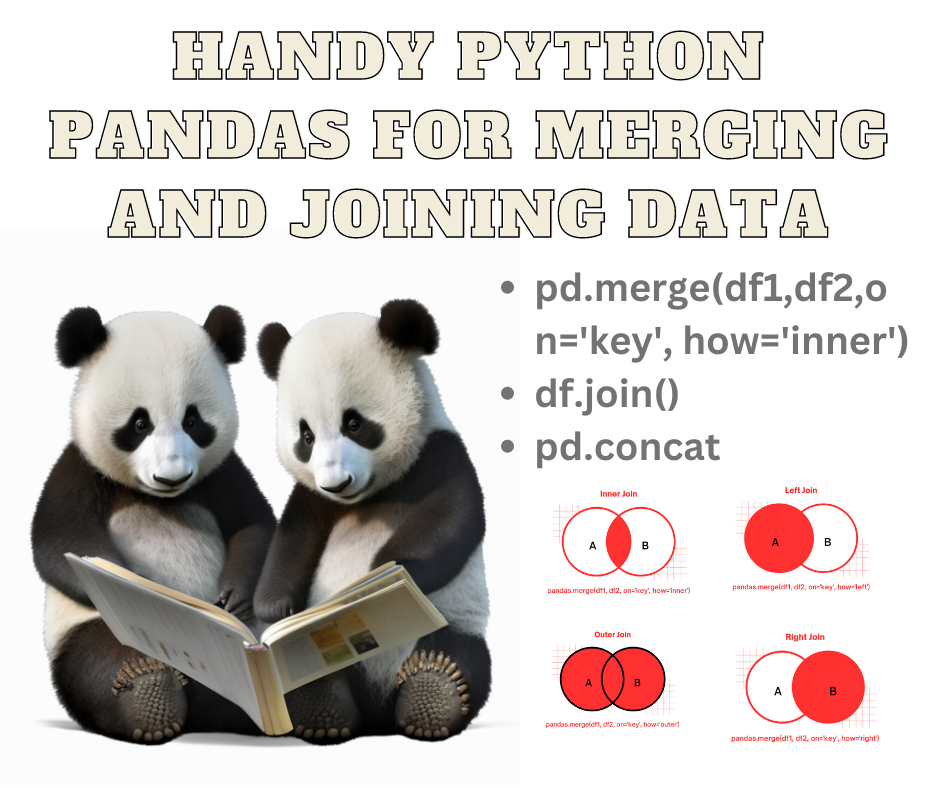

You can download the Jupyter notebook and data of this tutorial here
Table of Contents
1. Introduction
2. Types of merging - <code> __'inner', 'outer', 'left', 'right'__</code>
3. Joining
4. Concatenation

### 1.Introduction

In today's world, data is often scattered across multiple sources, such as databases, CSV files, and spreadsheets. Combining data from these disparate sources can be a time-consuming and error-prone task. However, merging and joining data can provide significant benefits, such as:
* Providing a more complete and accurate view of the data by combining data from different sources.
* Simplifying data analysis by allowing data to be easily compared and aggregated across multiple sources.
* Improving data quality by identifying and resolving data inconsistencies and duplicates.

__Merging__: Merging is the process of combining two or more data sets based on a common key or column. This can be achieved using the 'merge'function from the Pandas library.

__Joining__: Joining is similar to merging, but it is a specific type of merging that combines two or more data sets based on their index rather than a common key or column. This can be achieved using the 'join' method from the Pandas library.

__Concatenation__: Combining data from multiple sources along a given axis (either vertically or horizontally). This can be achieved using the 'concat'function from the Pandas library.

### 2. Types of merging - 'inner', 'outer', 'left', 'right'
There are several different types of merging operations that can be performed using Pandas, including:

* __Inner join__: Combining data based on matching values in specified columns, only including rows where the match exists in both data sets.


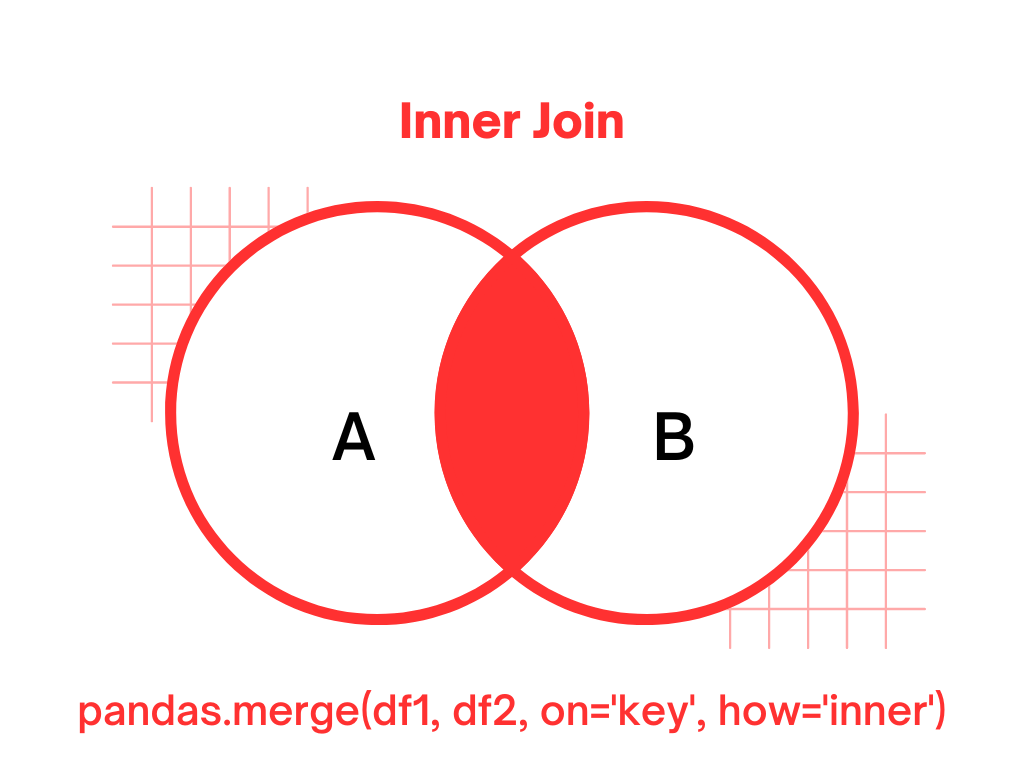

__Example__: Suppose we have two datasets - one containing information on <code>__'customers'__</code> and their <code>__'orders'__</code>, and another containing details on the <code>__'products'__</code> sold by the company:

In [2]:
import pandas as pd

# create customers dataset
customers = pd.DataFrame({'customer_id': ['C1', 'C2', 'C3', 'C4', 'C5'],
                          'customer_name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
                          'customer_email': ['alice@gmail.com', 'bob@gmail.com', 'charlie@gmail.com', 'david@gmail.com', 'emma@gmail.com']})

# create orders dataset
orders = pd.DataFrame({'order_id': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6'],
                       'product_id': ['P1', 'P2', 'P3', 'P4', 'P5','P6'],
                       'customer_id': ['C1', 'C1', 'C2', 'C3', 'C4', 'C5'],
                       'order_date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06'],
                       'order_total': [100, 200, 150, 50, 75, 300]})

# create products dataset
products = pd.DataFrame({'product_id': ['P1', 'P2', 'P3', 'P4', 'P5'],
                         'product_name': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
                         'cost_per_unit': [10.0, 20.0, 30.0, 40.0,50.0]})

# create sales dataset
sales = pd.DataFrame({'order_id': ['O1', 'O2', 'O3', 'O4', 'O5'],
                      'product_id': ['P1', 'P2', 'P3', 'P4', 'P5'],
                      'units_sold': [100, 200, 150, 50, 75],
                      'revenue': [1000.0, 4000.0, 4500.0, 2000.0, 3750.0]})

# create costs dataset
costs = pd.DataFrame({'product_id': ['P1', 'P2', 'P3', 'P4', 'P5'],
                      'cost_per_unit': [10.0, 20.0, 30.0, 40.0,50.0]})

In [9]:
customers

,customer_id,customer_name,customer_email
0,C1,Alice,alice@gmail.com
1,C2,Bob,bob@gmail.com
2,C3,Charlie,charlie@gmail.com
3,C4,David,david@gmail.com
4,C5,Emma,emma@gmail.com


In [10]:
orders

,order_id,product_id,customer_id,order_date,order_total
0,O1,P1,C1,2022-01-01,100
1,O2,P2,C1,2022-01-02,200
2,O3,P3,C2,2022-01-03,150
3,O4,P4,C3,2022-01-04,50
4,O5,P5,C4,2022-01-05,75
5,O6,P6,C5,2022-01-06,300


In [11]:
products

,product_id,product_name,cost_per_unit
0,P1,Product A,10.0
1,P2,Product B,20.0
2,P3,Product C,30.0
3,P4,Product D,40.0
4,P5,Product E,50.0


In [12]:
sales

,order_id,product_id,units_sold,revenue
0,O1,P1,100,1000.0
1,O2,P2,200,4000.0
2,O3,P3,150,4500.0
3,O4,P4,50,2000.0
4,O5,P5,75,3750.0


In [13]:
costs

,product_id,cost_per_unit
0,P1,10.0
1,P2,20.0
2,P3,30.0
3,P4,40.0
4,P5,50.0


We can use an __inner join__ to combine the <code>__'customers'__</code> and <code>__'orders'__</code> datasets on the shared column <code>__'customer_id'__</code>:

In [3]:
# merge customers and orders datasets on customer_id
customer_orders = pd.merge(customers, orders, on='customer_id', how='inner')

# print the resulting dataset
pd.DataFrame(customer_orders)

,customer_id,customer_name,customer_email,order_id,product_id,order_date,order_total
0,C1,Alice,alice@gmail.com,O1,P1,2022-01-01,100
1,C1,Alice,alice@gmail.com,O2,P2,2022-01-02,200
2,C2,Bob,bob@gmail.com,O3,P3,2022-01-03,150
3,C3,Charlie,charlie@gmail.com,O4,P4,2022-01-04,50
4,C4,David,david@gmail.com,O5,P5,2022-01-05,75
5,C5,Emma,emma@gmail.com,O6,P6,2022-01-06,300


In [4]:
# merge customer_orders and products datasets on product_id
final_data = pd.merge(customer_orders, products, on='product_id', how='inner')

# print the resulting dataset
pd.DataFrame(final_data)


,customer_id,customer_name,customer_email,order_id,product_id,order_date,order_total,product_name,cost_per_unit
0,C1,Alice,alice@gmail.com,O1,P1,2022-01-01,100,Product A,10.0
1,C1,Alice,alice@gmail.com,O2,P2,2022-01-02,200,Product B,20.0
2,C2,Bob,bob@gmail.com,O3,P3,2022-01-03,150,Product C,30.0
3,C3,Charlie,charlie@gmail.com,O4,P4,2022-01-04,50,Product D,40.0
4,C4,David,david@gmail.com,O5,P5,2022-01-05,75,Product E,50.0


* __Outer join__: Combining data based on matching values in specified columns, including all rows from both data sets and filling in missing values where there is no match.

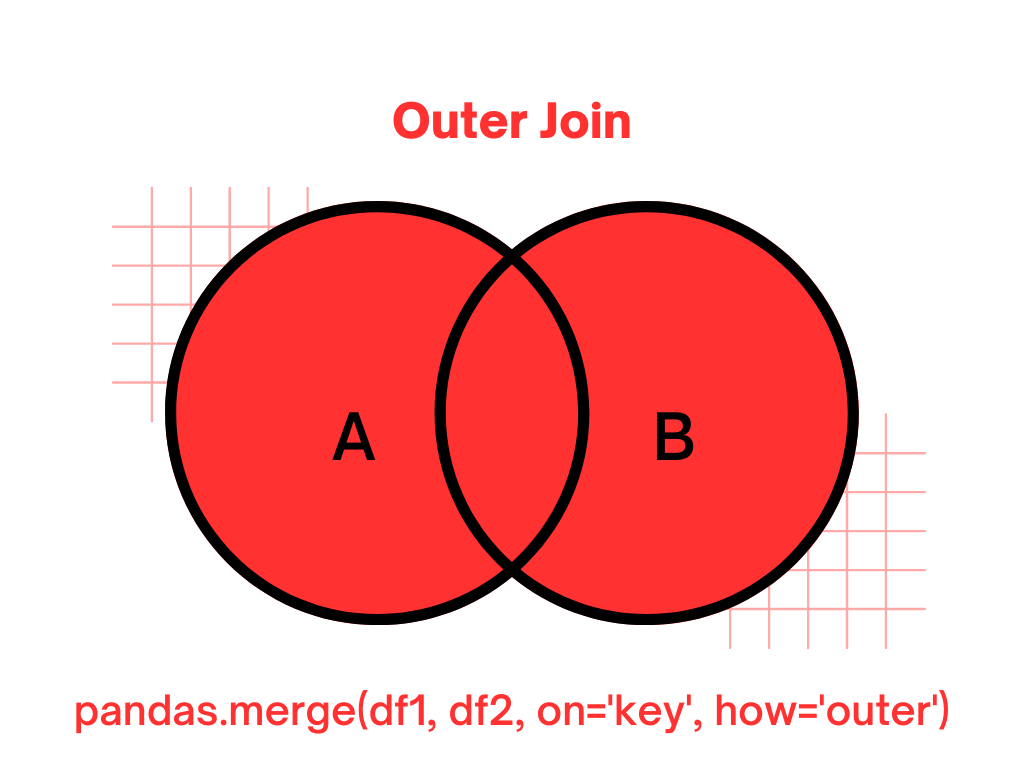

In [5]:
# perform an outer join on sales and costs datasets
sales_costs = pd.merge(sales, costs, on='product_id', how='outer')

# print the resulting dataset
pd.DataFrame(sales_costs)

,order_id,product_id,units_sold,revenue,cost_per_unit
0,O1,P1,100,1000.0,10.0
1,O2,P2,200,4000.0,20.0
2,O3,P3,150,4500.0,30.0
3,O4,P4,50,2000.0,40.0
4,O5,P5,75,3750.0,50.0


* __Left join__: Combining data based on matching values in specified columns, including all rows from the left data set and filling in missing values where there is no match in the right data set.

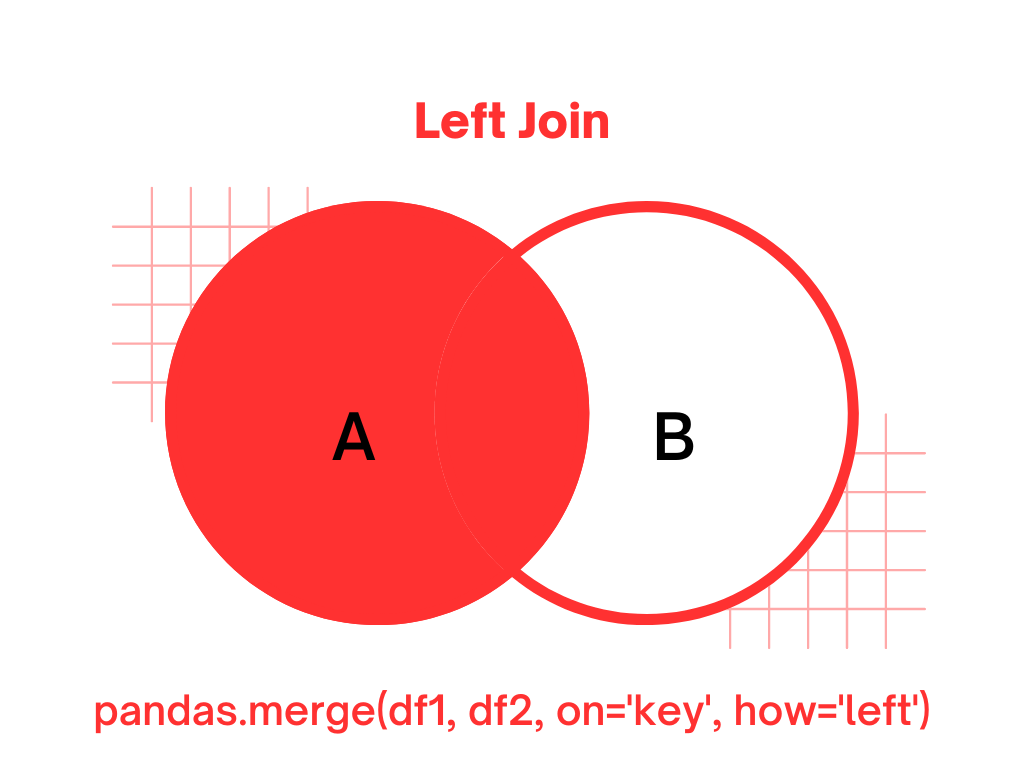

In [6]:
# perform a left join on sales and costs datasets
sales_costs = pd.merge(sales, costs, on='product_id', how='left')

# print the resulting dataset
pd.DataFrame(sales_costs)

,order_id,product_id,units_sold,revenue,cost_per_unit
0,O1,P1,100,1000.0,10.0
1,O2,P2,200,4000.0,20.0
2,O3,P3,150,4500.0,30.0
3,O4,P4,50,2000.0,40.0
4,O5,P5,75,3750.0,50.0


* __Right join__: Combining data based on matching values in specified columns, including all rows from the right data set and filling in missing values where there is no match in the left data set.

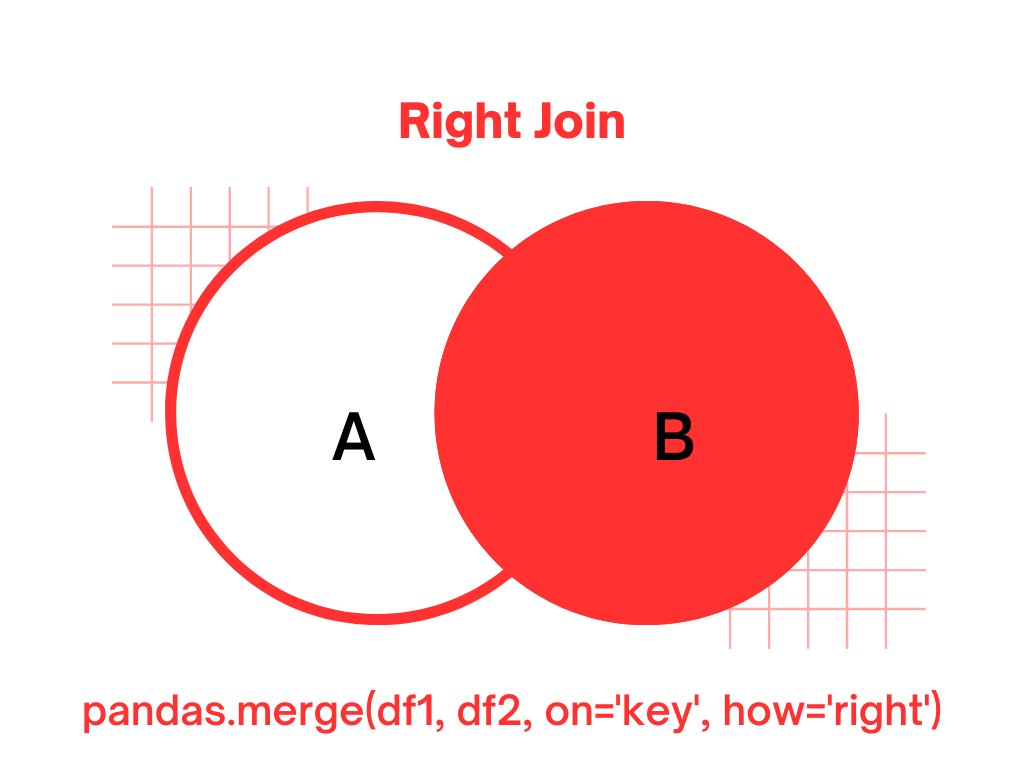

In [8]:
# perform a right join on sales and costs datasets
costs_sales = pd.merge(costs, sales, on='product_id', how='right')

# print the resulting dataset
pd.DataFrame(costs_sales)

,product_id,cost_per_unit,order_id,units_sold,revenue
0,P1,10.0,O1,100,1000.0
1,P2,20.0,O2,200,4000.0
2,P3,30.0,O3,150,4500.0
3,P4,40.0,O4,50,2000.0
4,P5,50.0,O5,75,3750.0


### 3. Joining: 

Joining is similar to merging, but it is a specific type of merging that combines two or more data sets based on their index rather than a common key or column. This can be achieved using the <code>__'join'__</code> method from the Pandas library.

In [80]:
# join customers and orders datasets based on customer_id
customer_orders = customers.join(orders.set_index('customer_id'), on='customer_id')

# join customer_orders and sales datasets based on order_id and product_id
sales_data = customer_orders.join(sales.set_index(['order_id', 'product_id']), on=['order_id', 'product_id'])

# join sales_data and costs datasets based on product_id
sales_data = sales_data.join(costs.set_index('product_id'), on='product_id')

pd.DataFrame(sales_data)


,customer_id,customer_name,customer_email,order_id,product_id,order_date,order_total,units_sold,revenue,cost_per_unit
0,C1,Alice,alice@gmail.com,O1,P1,2022-01-01,100,100.0,1000.0,10.0
0,C1,Alice,alice@gmail.com,O2,P2,2022-01-02,200,200.0,4000.0,20.0
1,C2,Bob,bob@gmail.com,O3,P3,2022-01-03,150,150.0,4500.0,30.0
2,C3,Charlie,charlie@gmail.com,O4,P4,2022-01-04,50,50.0,2000.0,40.0
3,C4,David,david@gmail.com,O5,P5,2022-01-05,75,75.0,3750.0,50.0
4,C5,Emma,emma@gmail.com,O6,P6,2022-01-06,300,NaN,NaN,NaN


### 4. Concatenation: 

Combining data from multiple sources along a given axis (either vertically or horizontally). This can be achieved using the <code>__'concat'__</code> function from the Pandas library.

In [14]:
# concatenate customers, orders, products, sales, and costs datasets
sales_data = pd.concat([customers, orders, products, sales, costs])

# reset the index of the resulting dataset
sales_data = sales_data.reset_index(drop=True)

# print the resulting dataset
pd.DataFrame(sales_data)

,customer_id,customer_name,customer_email,order_id,product_id,order_date,order_total,product_name,cost_per_unit,units_sold,revenue
0,C1,Alice,alice@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C2,Bob,bob@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C3,Charlie,charlie@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C4,David,david@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C5,Emma,emma@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C1,NaN,NaN,O1,P1,2022-01-01,100.0,NaN,NaN,NaN,NaN
6,C1,NaN,NaN,O2,P2,2022-01-02,200.0,NaN,NaN,NaN,NaN
7,C2,NaN,NaN,O3,P3,2022-01-03,150.0,NaN,NaN,NaN,NaN
8,C3,NaN,NaN,O4,P4,2022-01-04,50.0,NaN,NaN,NaN,NaN
9,C4,NaN,NaN,O5,P5,2022-01-05,75.0,NaN,NaN,NaN,NaN


### Many thanks for reading this post!🙏.

### If you found this content helpful😊, please LIKE 👍, SHARE, and FOLLOW to stay updated on our future posts.